## Vinicio Veletanga

In [ ]:
import collections
import random
import simpy
from tkinter import *
from tkinter import ttk  
from PIL import ImageTk,Image
from tkinter import messagebox

In [2]:
# pip install tkinter


In [ ]:
def ventaBoletos(env, num_boletos, pelicula, teatro):
    with teatro.contador.request() as turno:
        resultado = yield turno | teatro.sold_out[pelicula]
        if turno not in resultado:
            teatro.num_renegados[pelicula] += 1
            return
        if teatro.num_boletos[pelicula] < num_boletos:
            yield env.timeout(0.5) 
            return
    teatro.num_boletos[pelicula] -= num_boletos
    if teatro.num_boletos[pelicula] < 2:
        teatro.sold_out[pelicula].succeed()
        teatro.tiempo_agotado[pelicula] = env.now
        teatro.num_boletos[pelicula] = 0
    yield env.timeout(1)


def llegadaClientes(env, teatro):
    while True:
        yield env.timeout(random.expovariate(1/0.5))
        pelicula = random.choices(teatro.peliculas, teatro.probabilidad, k=1)
        num_boletos = random.randint(1, 6)
        if teatro.num_boletos[pelicula[0]]:
            env.process(ventaBoletos(env, num_boletos, pelicula[0], teatro))
            


In [ ]:
def process_run(vel,nboleto,tsimulacion):
    
    VELOCIDAD_LLEGADA = vel
    NUM_BOLETO = nboleto
    TIEMPO_SIMULACION = tsimulacion
    
    resultado = ""
    
    Teatro = collections.namedtuple('Teatro', 'contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados')

    print('Teatro Casa de la Cultura')
    
    resultado = "Teatro Casa de la Cultura"
    env = simpy.Environment()

    contador = simpy.Resource(env,capacity=1)
    peliculas = ['Era de Hielo', 'Willow', 'Juegos del Hambre']
    
    resultado = resultado +"\n"
    
    probabilidad=[0.1, 0.3, 0.6]
    num_boletos = {pelicula: NUM_BOLETO for pelicula in peliculas}
    sold_out = {pelicula: env.event() for pelicula in peliculas}
    tiempo_agotado = {pelicula: None for pelicula in peliculas}
    num_renegados = {pelicula: 0 for pelicula in peliculas}

    teatro = Teatro(contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados)
    env.process(llegadaClientes(env, teatro))
    env.run(until=TIEMPO_SIMULACION)
    # Analisis y resultados
    for pelicula in peliculas:
        if teatro.sold_out[pelicula]:
            print('La película: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula]))
            sms1 = 'La película: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula])
            
            print('# personas que salieron de la fila/renegados %s' %teatro.num_renegados[pelicula])
            sms2 = '# personas que salieron de la fila/renegados %s' %teatro.num_renegados[pelicula]
            
            resultado = resultado + "\n" + sms1 +"\n"+ sms2
    return resultado


In [ ]:
resp = process_run(vel=52,nboleto=10,tsimulacion=200)
print("Resultado=> ",resp)

In [ ]:
ventana = Toplevel()
ventana.geometry("420x280")
ventana.title("Películas",)
imagen=ImageTk.PhotoImage(file="/home/vinicio/Documents/Simulacion/fondo.png")
fondo=Label(ventana,image=imagen).place(x=0,y=0)
ventana.resizable(0,0)

txvelocidad=StringVar()
velocidad = Label(ventana,text="Velocidad", width=10).place(x=15, y=10)
txtvelocidad = ttk.Entry(ventana, textvariable=txvelocidad).place(x=150,y=10)

txnboleto=StringVar()
nboleto = Label(ventana,text="# boletos", width=20).place(x=5, y=40)
txtnboleto = Spinbox(ventana, from_=0, to=100, width=5,textvariable=txnboleto).place(x=150,y=40)

txsimulacion=StringVar()
simulacion = Label(ventana,text="Tiempo", width=20).place(x=10, y=70)
txtsimulacion = ttk.Entry(ventana,textvariable=txsimulacion).place(x=150,y=70)
#spin = Spinbox(ventana, from_=0, to=100, width=5,text="Tiempo").place(x=18, y=72)

def guardar():
    vel = txvelocidad.get()
    nbol=txnboleto.get()
    sim=txsimulacion.get()
    
    res = process_run(vel=int(vel),nboleto=int(nbol),tsimulacion=int(sim))
    print("resp ",res)
    messagebox.showinfo(message=res,title="Resultados simulación")
    

Button(ventana, text="Run", command=guardar,bg="yellow", fg="red").place(x=100, y=150,)

ventana.mainloop()

## Resultados al ejecutar
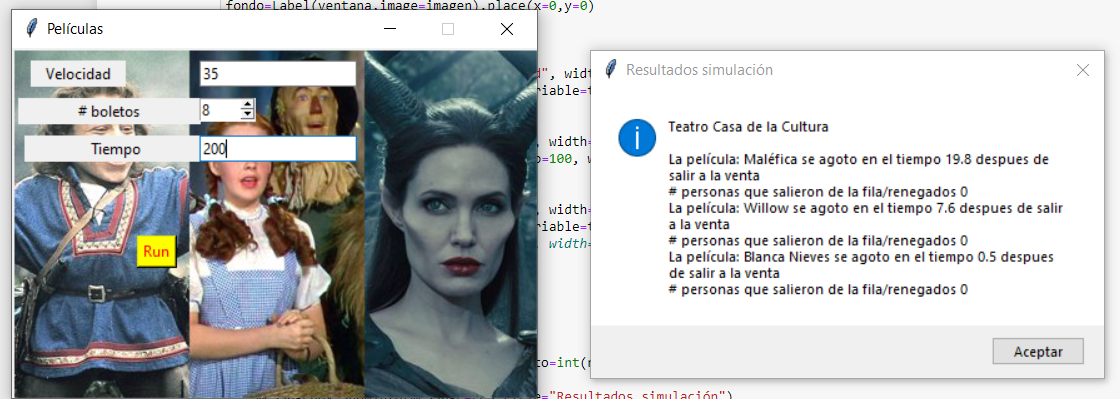